In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [3]:
from keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

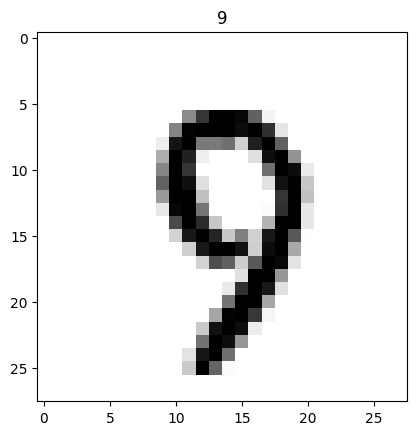

In [7]:
img_index = 6634
plt.imshow(X_train[img_index], plt.cm.binary)
plt.title(y_train[img_index])
plt.show()

In [8]:
X_train[img_index]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

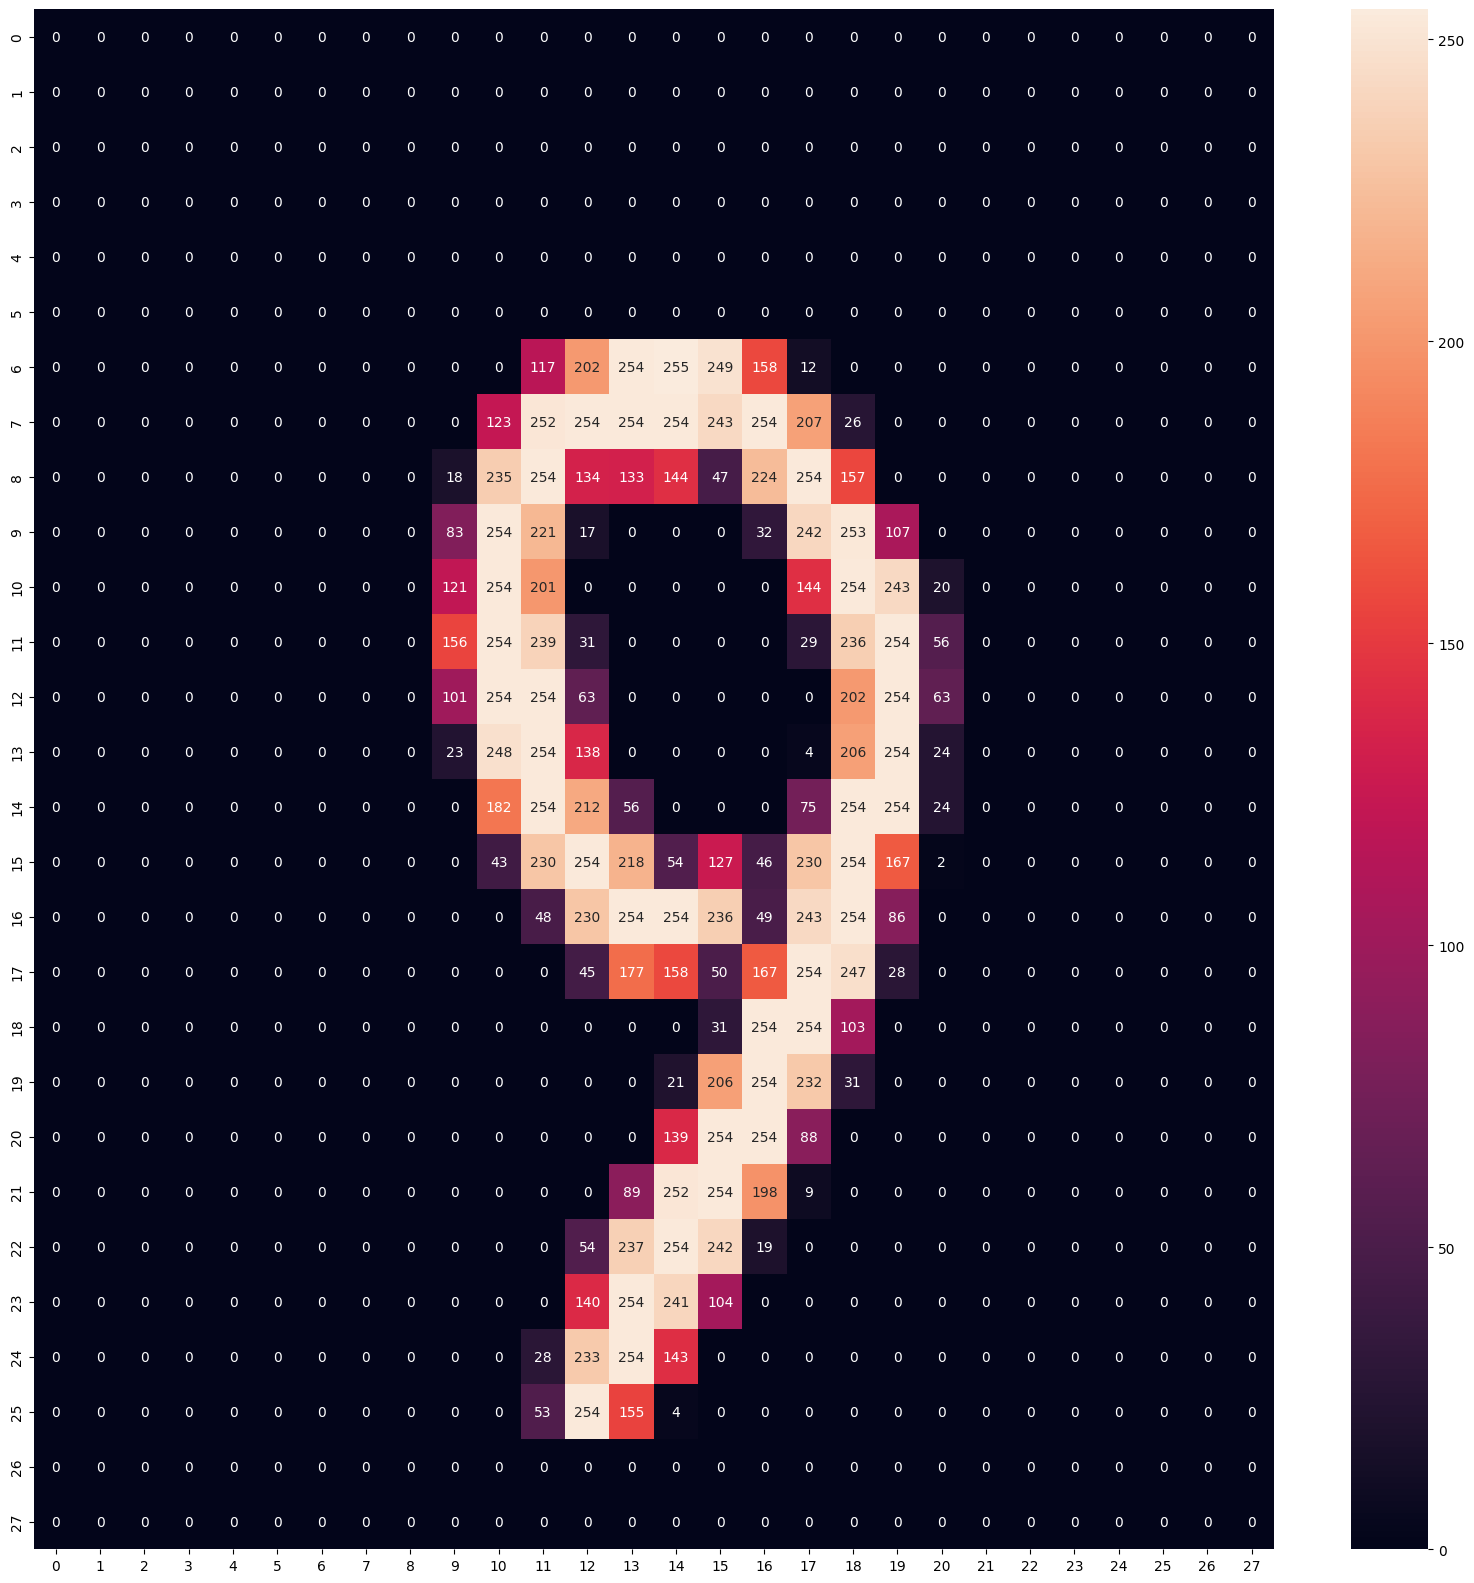

In [9]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(X_train[img_index], annot=True, fmt='.3g')
plt.show()

In [10]:
28 * 28

784

In [11]:
X_train = X_train.reshape(60_000, 784)
X_test = X_test.reshape(10_000, 784)

In [12]:
from collections import Counter
Counter(y_train)

Counter({1: 6742,
         7: 6265,
         3: 6131,
         2: 5958,
         9: 5949,
         0: 5923,
         6: 5918,
         8: 5851,
         4: 5842,
         5: 5421})

In [13]:
from keras.utils import to_categorical

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_test[img_index]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
model = Sequential()

# Input Layer
model.add(Dense(input_dim=784, units=64, activation='relu'))
model.add(Dropout(0.2))

# Hidden Layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [18]:
es = EarlyStopping(monitor='val_loss', patience=5)

checkpoint = ModelCheckpoint(filepath='model_checkpoint.h5',
                            save_best_only=True,
                            save_weights_only=False)

In [19]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50000, callbacks=[es, checkpoint])

Epoch 1/50000
1875/1875 [==============================] - 5s 2ms/step - loss: 2.6139 - accuracy: 0.1485 - val_loss: 2.0185 - val_accuracy: 0.2110
Epoch 2/50000
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8975 - accuracy: 0.2741 - val_loss: 1.5253 - val_accuracy: 0.4033
Epoch 3/50000
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5662 - accuracy: 0.3743 - val_loss: 1.3595 - val_accuracy: 0.4574
Epoch 4/50000
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4014 - accuracy: 0.4660 - val_loss: 1.1704 - val_accuracy: 0.5325
Epoch 5/50000
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2786 - accuracy: 0.4885 - val_loss: 1.0862 - val_accuracy: 0.5453
Epoch 6/50000
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2178 - accuracy: 0.5006 - val_loss: 1.0241 - val_accuracy: 0.5619
Epoch 7/50000
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1799 - accuracy: 0.5069 - val_loss: 1

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

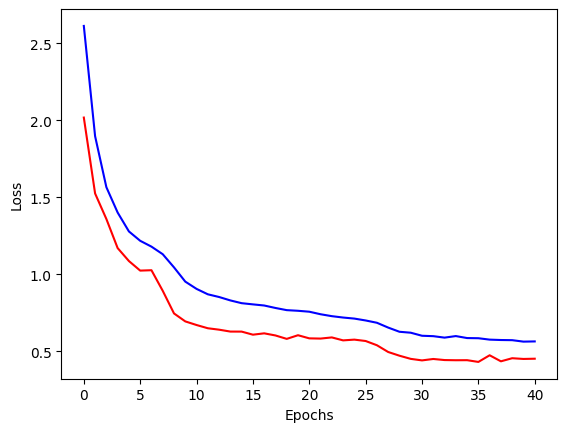

In [21]:
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(history.history['loss'], c='b')
plt.plot(history.history['val_loss'], c='r')
plt.show()

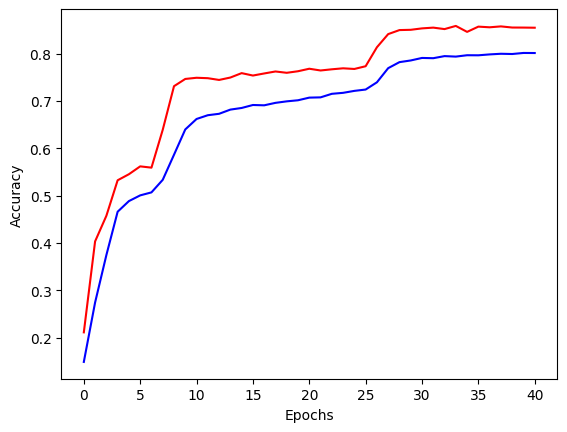

In [22]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(history.history['accuracy'], c='b')
plt.plot(history.history['val_accuracy'], c='r')
plt.show()